# Example 1: Model selection from two Gaussian
Given two models with means well separated and a variance that can specified at a later time
$$ \mathcal M_1: \mathcal N(10, \sigma) \qquad \mathcal M_2: \mathcal N(-10, \sigma) $$
We can use global linear model mixing to do model selection.

In [29]:
# A package I wrote to make things work with the environment
import _mypackage

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

from Taweret.core.base_model import BaseModel
from Taweret.mix.linear import LinearMixerGlobal

import my_plotting as mp

%matplotlib inline

In [34]:
class Model(BaseModel):
    def __init__(self, mean):
        self.m_mean = mean
        
    def evaluate(self):
        return self.m_mean
    
    def log_likelihood_elementwise(self, y_exp, y_err):
        result = np.exp(-(self.evaluate() - y_exp) ** 2 / (2 * y_err ** 2))
        result /= np.sqrt(2 * np.pi * y_err ** 2)
        return np.sum(np.log(result))
    
    def set_prior(self):
        pass

In [39]:
def test_two_model_global_mixing(loc):
    models = {'plus': Model(mean=10), 'minus': Model(mean=-10)}
    global_linear_mix = LinearMixerGlobal(models=models, n_mix=len(models))
    global_linear_mix.set_prior(scale=1)
    
    y_exp = loc
    y_err = 0.05
    posterior = global_linear_mix.train(y_exp=y_exp, y_err=y_err, burn=50, steps=2_000)
    cols = 2
    rows = 1
    fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(cols * 7, rows * 7))
    fig.patch.set_facecolor('white')
    weights = np.vstack([dirichlet(np.exp(sample)).rvs(size=100)
                         for sample in posterior.reshape(-1, len(models))])
    
    bins = ax[0].hist(weights[:, 0], color='red', bins=100, histtype='step', label=r'$w_1$')[1]
    ax[0].hist(weights[:, 1], color='blue', bins=bins, histtype='step', label=r'$w_2$')
    ax[0].legend(fontsize=20)
    mp.costumize_axis(ax[0], x_title=r'$w_i$', y_title=r'$\mathcal P_\mathrm{pred}(w_i | \alpha)$')
    
    hyper_parameters = np.array([np.exp(sample) for sample in posterior.reshape(-1, len(models))])
    _, bin_edges = ax[1].hist(hyper_parameters[:, 0],
                              color='black',
                              bins=100,
                              density=True,
                              histtype='step',
                              range=(1, 15),
                              label=r'$\alpha_1$')[:2]
    ax[1].hist(hyper_parameters[:, 1],
               color='gray',
               bins=bin_edges,
               density=True,
               histtype='step',
               label=r'$\alpha_2$')
    mp.costumize_axis(ax[1], x_title=r'$\alpha_i$', y_title=r'$\mathcal P_\mathrm{pred}(\alpha)$')
    ax[1].legend(fontsize=20)
    fig.tight_layout()

Notice: For global fitting, the prior is always assumed to be
        a Dirichlet distribution
Burn-in sampling


100%|████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.59it/s]


Burn-in samping complete
Now running other samples


100%|██████████████████████████████████████████████████████████████| 4000/4000 [04:46<00:00, 13.98it/s]


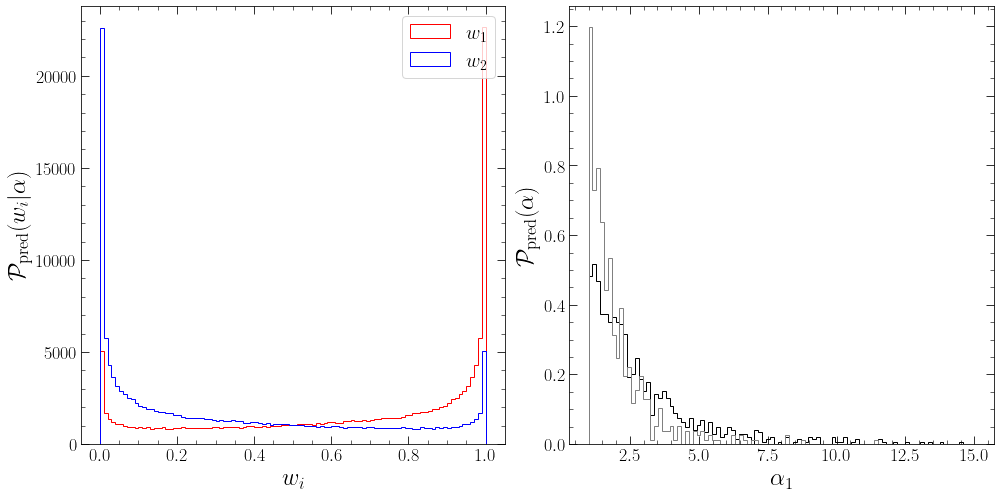

In [40]:
test_two_model_global_mixing(loc=10)

Notice: For global fitting, the prior is always assumed to be
        a Dirichlet distribution
Burn-in sampling


100%|████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.71it/s]


Burn-in samping complete
Now running other samples


100%|██████████████████████████████████████████████████████████████| 4000/4000 [04:48<00:00, 13.87it/s]


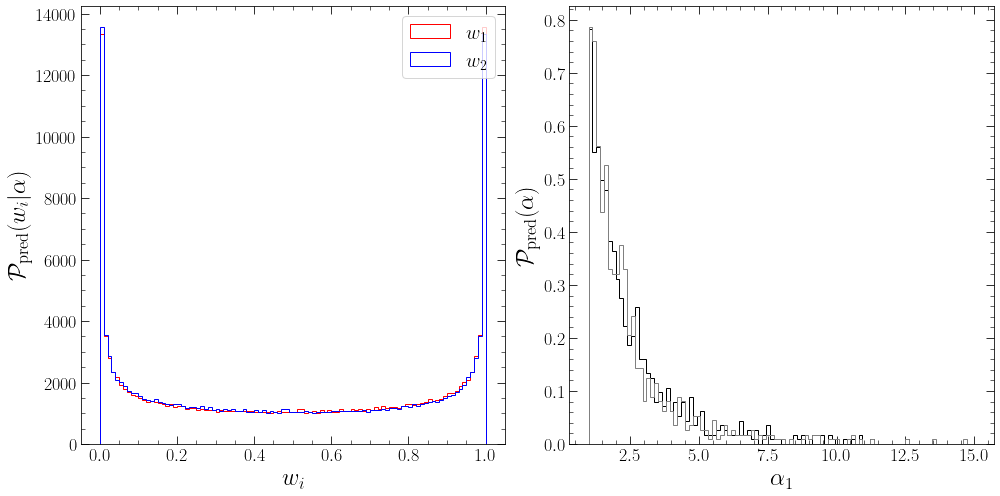

In [41]:
test_two_model_global_mixing(loc=0)

Notice: For global fitting, the prior is always assumed to be
        a Dirichlet distribution
Burn-in sampling


100%|████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.73it/s]


Burn-in samping complete
Now running other samples


100%|██████████████████████████████████████████████████████████████| 4000/4000 [04:48<00:00, 13.85it/s]


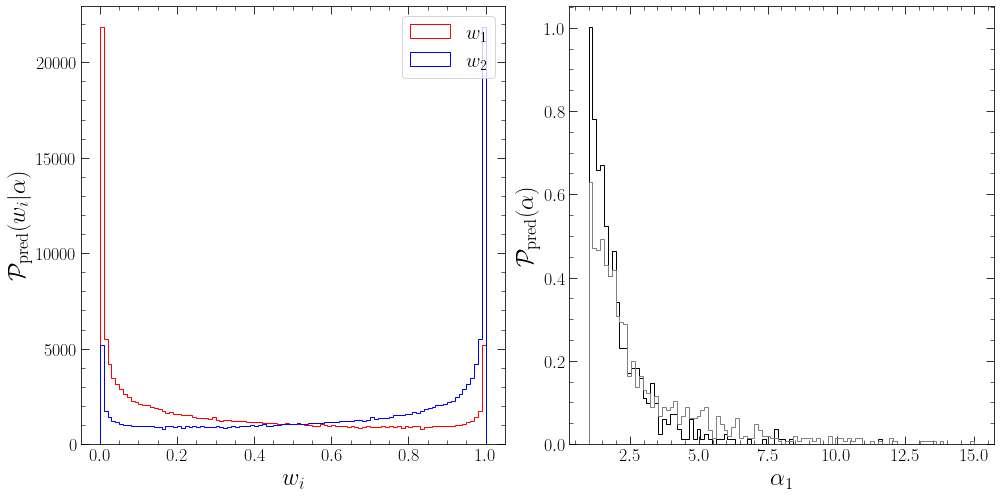

In [42]:
test_two_model_global_mixing(loc=-10)